In [1]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

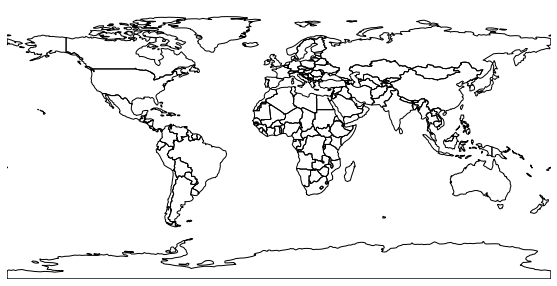

In [9]:


# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add borders to the plot
shape_file = shpreader.natural_earth(resolution='110m',
                                     category='cultural',
                                     name='admin_0_countries')
for shape in shpreader.Reader(shape_file).records():
    ax.add_geometries([shape.geometry], ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none')
    
ax.set_frame_on(False)


# Save the plot as an SVG file
plt.savefig('borders.svg', format='svg', dpi=300, bbox_inches=0)

# Load the SVG file as an ElementTree
tree = ET.parse('borders.svg')
root = tree.getroot()

# Find the first "g" element and add the shapes as children
g = root.find('.//{http://www.w3.org/2000/svg}g')
for shape in shpreader.Reader(shape_file).records():
    path = ET.Element('path')
    path.set('d', shape.geometry.svg(scale_factor=1))
    path.set('stroke', 'black')
    path.set('fill', 'none')
    g.append(path)

# Write the updated SVG file to disk
tree.write('borders.svg')

In [3]:
# Save the plot as an SVG file
plt.savefig('borders.svg', format='svg', dpi=300)


<Figure size 432x288 with 0 Axes>

In [7]:

# Format the SVG file
with open('borders.svg', 'r') as f:
    xml_string = f.read()
    svg = minidom.parseString(xml_string)
    print(svg)
    svg.documentElement.setAttributeNS("http://www.w3.org/2000/xmlns/", "xmlns", "http://www.w3.org/2000/svg")
    svg.documentElement.setAttributeNS("http://www.w3.org/2000/xmlns/", "xmlns:xlink", "http://www.w3.org/1999/xlink")
    svg.documentElement.setAttribute("viewBox", "0 0 1000 500")
    svg.documentElement.setAttribute("width", "1000")
    svg.documentElement.setAttribute("height", "500")
    with open('borders_2.svg', 'w') as f:
        f.write(svg.toxml())

NameError: name 'minidom' is not defined